In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib  


In [2]:
# 1. MNIST Datensatz aus keras laden
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. Das Shape des Datensatzes ausgeben
print("Ursprungs Shape des Trainingsdatensatzes:", x_train.shape)
print("Ursprungs Shape des Testdatensatzes:", x_test.shape)

Ursprungs Shape des Trainingsdatensatzes: (60000, 28, 28)
Ursprungs Shape des Testdatensatzes: (10000, 28, 28)


In [4]:
# 3. Den Datensatz für ein SVM vorbereiten
# Flatten der Bildmatrizen für die SVM (von 28x28 zu 784)
x_train_svm = x_train.reshape((x_train.shape[0], -1))
x_test_svm = x_test.reshape((x_test.shape[0], -1))
# Standardisierung der Feature-Werte
scaler = StandardScaler()
x_train_svm = scaler.fit_transform(x_train_svm)
x_test_svm = scaler.transform(x_test_svm)

In [5]:
# 5. Das Shape des Datensatzes ausgeben
print("SVM Shape des Trainingsdatensatzes:", x_train_svm.shape)
print("SVM Shape des Testdatensatzes:", x_test_svm.shape)

SVM Shape des Trainingsdatensatzes: (60000, 784)
SVM Shape des Testdatensatzes: (10000, 784)


In [6]:
# 6. Das SVM Modell definieren und trainieren

svc = svm.SVC(gamma='scale', C=10, kernel='rbf')

svc.fit(x_train_svm, y_train)

SVC(C=10)

In [7]:
# 7. Das SVM Modell auf den Testdaten evaluieren

result = svc.predict(x_test_svm)

In [8]:
print(classification_report(y_test, result, digits=4))

              precision    recall  f1-score   support

           0     0.9847    0.9857    0.9852       980
           1     0.9869    0.9930    0.9899      1135
           2     0.9625    0.9690    0.9657      1032
           3     0.9743    0.9752    0.9748      1010
           4     0.9744    0.9674    0.9709       982
           5     0.9663    0.9641    0.9652       892
           6     0.9852    0.9760    0.9806       958
           7     0.9416    0.9728    0.9569      1028
           8     0.9759    0.9579    0.9668       974
           9     0.9739    0.9604    0.9671      1009

    accuracy                         0.9725     10000
   macro avg     0.9726    0.9721    0.9723     10000
weighted avg     0.9726    0.9725    0.9725     10000



In [9]:
# Report exportieren
# Erstellen des Berichts als Dictionary
report_dict = classification_report(y_test, result, digits=4, output_dict=True)

# Umwandeln des Berichts-Dictionary in einen DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Exportieren des DataFrames in eine Excel-Datei
report_df.to_excel('classification_report.xlsx', sheet_name='Bericht')

In [10]:
print('Der für gamma berechnete Wert ist: ' + str(svc._gamma))

Der für gamma berechnete Wert ist: 0.0013947001394699755


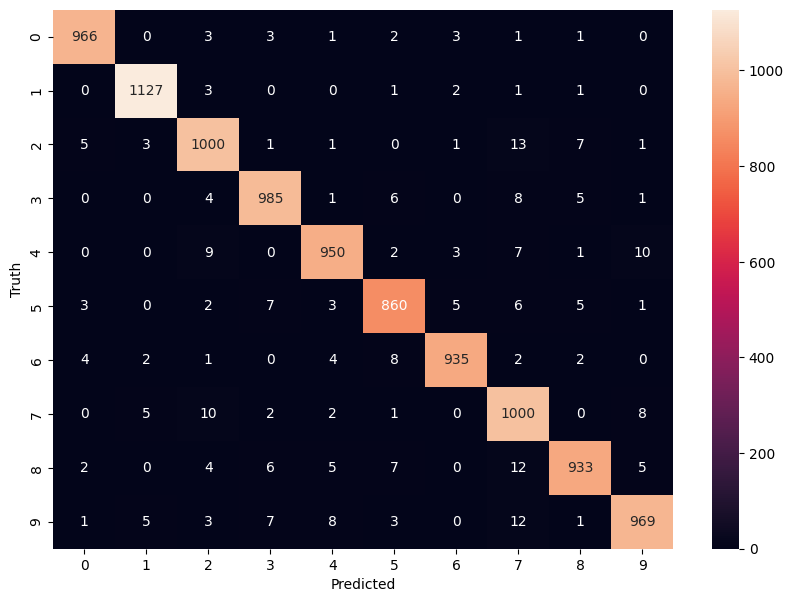

In [11]:
# Auswertung

cm = confusion_matrix(y_test, result)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

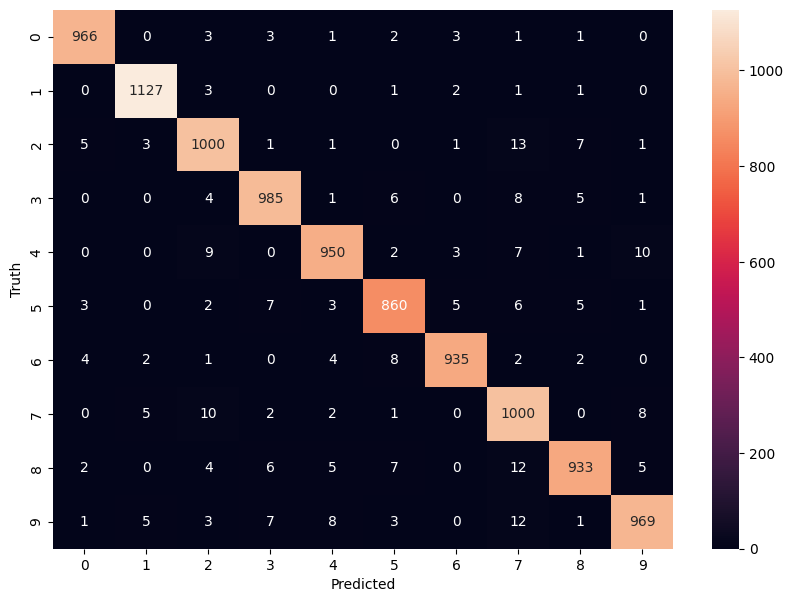

In [12]:
# Auswertung

cm = confusion_matrix(y_test, result)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

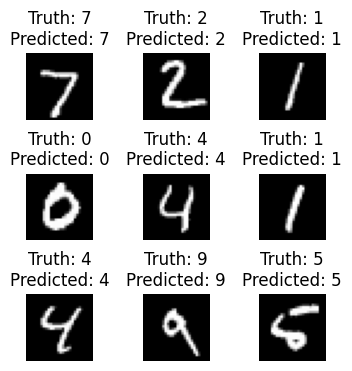

In [13]:
# Plotting some true predictions

fig, axes = plt.subplots(3, 3, figsize=(4, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.5)  # Adjust the spacing between images
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f'Truth: {y_test[i]}\nPredicted: {result[i]}')
    ax.axis('off')
plt.show()

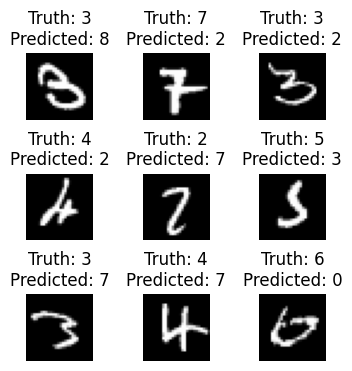

In [14]:
# Plotting some false predictions

count = 0
mismatched_entries = []
for i in range(len(result)):
    if result[i] != y_test[i]:
        mismatched_entries.append((result[i], y_test[i], x_test[i]))
        count += 1
    if count == 9:
        break

fig, axes = plt.subplots(3, 3, figsize=(4, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.5)  # Adjust the spacing between images
for i, ax in enumerate(axes.flat):
    ax.imshow(mismatched_entries[i][2], cmap='gray')
    ax.set_title(f'Truth: {mismatched_entries[i][1]}\nPredicted: {mismatched_entries[i][0]}')
    ax.axis('off')
plt.show()

In [15]:
# Speichern des Modells

joblib.dump(svc, 'models/svm_v1_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'models/svm_v1_model.pkl'